### Gradient boosted regression trees (gradient boosting machines) GBM


The gradient boosted regression tree is another ensemble method that combines multiple decision trees to create a more powerful model. 

Despite the “regression” in the name, these models can be used for **regression and classification.**

Like in **Random Forest Trees are working Independently** in
**GBM Trees work sequentially correcting error made by previous ones**

gradient boosting works by building trees in a serial man‐
ner, where each tree tries to correct the mistakes of the previous one. By default, there
is no randomization in gradient boosted regression trees; instead, strong pre-pruning
is used. Gradient boosted trees often use very shallow trees, of depth one to five,
which makes the model smaller in terms of memory and makes predictions faster

The main idea behind gradient boosting is to combine many simple models (in this
context known as weak learners), like shallow trees. Each tree can only provide good
predictions on part of the data, and so more and more trees are added to iteratively
improve performance.

Gradient boosted trees are frequently the **winning entries in machine learning competitions, and are widely used in industry.**
They are generally a bit more sensitive to parameter settings than random forests, but can provide better accuracy if the param‐
eters are set correctly.

Apart from the pre-pruning and the number of trees in the ensemble, another impor‐
tant parameter of gradient boosting is the 

**learning_rate**, ***which controls how strongly each tree tries to correct the mistakes of the previous trees***. A higher learning
rate means each tree can make stronger corrections, allowing for more complex models. Adding more trees to the ensemble, which can be accomplished by increasing n_estimators, also increases the model complexity, as the model has more chances
to correct mistakes on the training set

Here is an example of using GradientBoostingClassifier on the Breast Cancer
dataset. By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used:

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
# Load the breast cancer dataset
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.965


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfit‐
ting, we could either apply stronger pre-pruning by limiting the maximum depth or
lower the learning rate:


In [3]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [4]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.958


Both methods of decreasing the model complexity reduced the training set accuracy,
as expected. 
#### In this case, lowering the maximum depth of the trees provided a significant improvement of the model,
#### while lowering the learning rate only increased the generalization performance slightly

As for the other decision tree–based models, we can again visualize the feature
importances to get more insight into our model. As we used 100 trees, it
is impractical to inspect them all, even if they are all of depth 1

In [6]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
 n_features = cancer.data.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), cancer.feature_names)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")

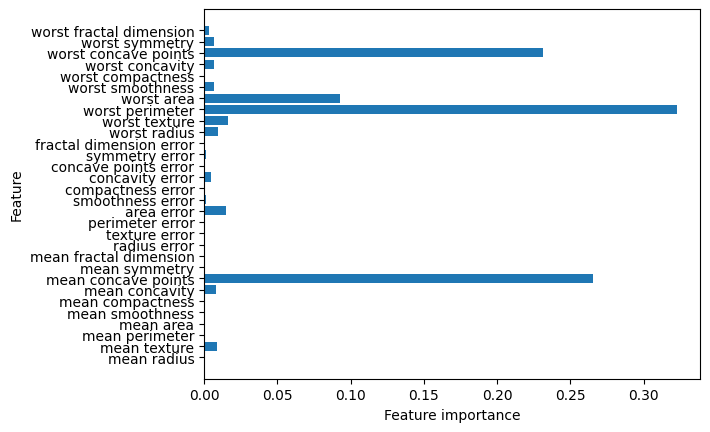

In [7]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

We can see that the feature importances of the gradient boosted trees are somewhat
similar to the feature importances of the random forests, though the gradient boost‐
ing completely ignored some of the features


### Random Forests vs. Gradient Boosting: A Quick Guide

For robust performance on similar datasets, start with random forests. If time is critical or maximum accuracy is the goal, consider transitioning to gradient boosting. For large-scale applications, explore the faster and more tunable xgboost package, particularly for optimal Python integration. This strategic approach allows flexibility in choosing between random forests and gradient boosting based on specific requirements.


#### Gradient Boosted Decision Trees: Pros and Cons

**Strengths:**

1. Powerful and widely used for supervised learning.
2. Effective on a mix of binary and continuous features without scaling.

**Weaknesses:**

1. Requires careful parameter tuning, potentially leading to long training times.
2. Not ideal for high-dimensional sparse data.

**Key Parameters:**

**Number of Trees (n_estimators):** Higher values may overfit, balance with learning_rate.

**Learning Rate:** Controls the extent of each tree's correction, interconnected with n_estimators.

**Max Depth (max_depth):** Limits tree complexity, often kept low for gradient boosted models.

This model's effectiveness makes it a popular choice, but careful parameter adjustment is essential for optimal performance.